In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
df = pd.read_csv("./Full Stats Table.csv")

In [3]:
df.head(3)

Season  Age  Games  Minutes Per Game  FG Per Game  FG Attempts Per Game  \
0    1979   20     77              36.3          6.5                  12.3   
1    1981   22     78              38.3          7.1                  13.3   
2    1982   23     79              36.8          6.5                  11.8   

    FG %  3PT Per Game  3PT Attempts Per Game  3PT %       ...         \
0  0.530           0.1                    0.4  0.226       ...          
1  0.537           0.1                    0.4  0.207       ...          
2  0.548           0.0                    0.3  0.000       ...          

   Box +/-  VORP  Wins Over Replacement  All-Star Games  MVP Trophy  \
0      5.5   5.3                  14.31               1           0   
1      8.3   7.8                  21.06               1           0   
2      7.4   6.9                  18.63               1           0   

   MVP Placing  Shares of MVP Votes  Playoff Appearance  NBA Championship  \
0            0                0.000                   1                 1   
1            8                0.097                   1                 1   
2            3                0.406                   1                 0   

   Player Nickname  
0            Magic  
1            Magic  
2            Magic  

[3 rows x 47 columns]

In [4]:
df.set_index("Season", inplace=True)
df.head(10)

Age  Games  Minutes Per Game  FG Per Game  FG Attempts Per Game  \
Season                                                                    
1979     20     77              36.3          6.5                  12.3   
1981     22     78              38.3          7.1                  13.3   
1982     23     79              36.8          6.5                  11.8   
1983     24     67              38.3          6.6                  11.6   
1984     25     77              36.1          6.5                  11.7   
1985     26     72              35.8          6.7                  12.8   
1986     27     80              36.3          8.5                  16.4   
1987     28     72              36.6          6.8                  13.8   
1988     29     77              37.5          7.5                  14.8   
1989     30     79              37.2          6.9                  14.4   

         FG %  3PT Per Game  3PT Attempts Per Game  3PT %  2PT Per Game  \
Season                                                                    
1979    0.530           0.1                    0.4  0.226           6.4   
1981    0.537           0.1                    0.4  0.207           7.1   
1982    0.548           0.0                    0.3  0.000           6.5   
1983    0.565           0.1                    0.4  0.207           6.5   
1984    0.561           0.1                    0.5  0.189           6.5   
1985    0.526           0.1                    0.6  0.233           6.6   
1986    0.522           0.1                    0.5  0.205           8.4   
1987    0.492           0.2                    0.8  0.196           6.7   
1988    0.509           0.8                    2.4  0.314           6.8   
1989    0.480           1.3                    3.5  0.384           5.6   

             ...         Box +/-  VORP  Wins Over Replacement  All-Star Games  \
Season       ...                                                                
1979         ...             5.5   5.3                  14.31               1   
1981         ...             8.3   7.8                  21.06               1   
1982         ...             7.4   6.9                  18.63               1   
1983         ...             6.1   5.2                  14.04               1   
1984         ...             5.4   5.2                  14.04               1   
1985         ...             5.9   5.2                  14.04               1   
1986         ...             8.1   7.4                  19.98               1   
1987         ...             5.3   4.9                  13.23               1   
1988         ...             9.3   8.2                  22.14               1   
1989         ...             9.5   8.5                  22.95               1   

        MVP Trophy  MVP Placing  Shares of MVP Votes  Playoff Appearance  \
Season                                                                     
1979             0            0                0.000                   1   
1981             0            8                0.097                   1   
1982             0            3                0.406                   1   
1983             0            3                0.401                   1   
1984             0            2                0.338                   1   
1985             0            3                0.263                   1   
1986             1            1                0.940                   1   
1987             0            3                0.635                   1   
1988             1            1                0.762                   1   
1989             1            1                0.691                   1   

        NBA Championship  Player Nickname  
Season                                     
1979                   1            Magic  
1981                   1            Magic  
1982                   0            Magic  
1983                   0            Magic  
1984                   1            Magic  
1985        

In [5]:
df.corr()

Age     Games  Minutes Per Game  FG Per Game  \
Age                     1.000000 -0.281525         -0.542205    -0.291296   
Games                  -0.281525  1.000000          0.308250     0.275407   
Minutes Per Game       -0.542205  0.308250          1.000000     0.701400   
FG Per Game            -0.291296  0.275407          0.701400     1.000000   
FG Attempts Per Game   -0.289585  0.245397          0.766326     0.901898   
FG %                    0.010496  0.039845         -0.129436     0.210652   
3PT Per Game           -0.086496  0.120349          0.106408     0.117784   
3PT Attempts Per Game  -0.108482  0.120593          0.168347     0.143536   
3PT %                  -0.089075  0.178721          0.219629     0.109301   
2PT Per Game           -0.232659  0.205422          0.613621     0.888363   
2PT Attempts Per Game  -0.228792  0.177876          0.678568     0.831287   
2PT %                  -0.016424  0.075509         -0.093794     0.253033   
Effective FG%          -0.019799  0.101166         -0.145602     0.204831   
FT Per Game            -0.384587  0.241948          0.703964     0.684329   
FT Attempts Per Game   -0.378310  0.122001          0.628138     0.704438   
FT %                   -0.033022  0.242018          0.166757    -0.003889   
Offensive Reb Per Game -0.142145  0.023876          0.014877     0.162399   
Defensive Reb Per Game  0.051407  0.081790          0.038066     0.168648   
Total Reb Per Game     -0.015189  0.067964          0.034169     0.181944   
Assists Per Game       -0.211310  0.185827          0.330709     0.033593   
Steals Per Game        -0.346604  0.199004          0.522904     0.385635   
Blocks Per Game         0.006766 -0.046237         -0.041875     0.151744   
Turnovers Per Game     -0.441209  0.084072          0.587210     0.292492   
Fouls Per Game         -0.313263  0.085799          0.108197     0.151795   
Points Per Game        -0.347519  0.294240          0.743825     0.949756   
PER                    -0.157950  0.220886          0.353343     0.726381   
True Shooting          -0.134852  0.227821          0.028427     0.236142   
Total Rebounding %      0.179398 -0.047033         -0.258760    -0.026757   
Assist %               -0.144482  0.109960          0.291579     0.087156   
Steal %                -0.253708  0.112297          0.379369     0.290236   
Block %                 0.141802 -0.140297         -0.229941     0.021578   
Turnover %             -0.185967 -0.094668         -0.020792    -0.390070   
Usage %                -0.076834  0.024413          0.446990     0.775368   
Win Shares             -0.299297  0.602377          0.472049     0.638437   
Offensive Box +/-      -0.340874  0.323757          0.486258     0.627478   
Defensive Box +/-       0.098635  0.027932         -0.076777     0.029046   
Box +/-                -0.255359  0.311762          0.402437     0.594451   
VORP                   -0.326936  0.524051          0.516047     0.651126   
Wins Over Replacement  -0.326936  0.524051          0.516047     0.651126   
All-Star Games         -0.092812  0.374714          0.393664     0.468257   
MVP Trophy             -0.014564  0.224190          0.147218     0.247072   
MVP Placing            -0.057537 -0.106679          0.075426     0.003856   
Shares of MVP Votes    -0.108055  0.349472          0.325463     0.525978   
Playoff Appearance     -0.015742  0.168116          0.083268     0.238346   
NBA Championship       -0.031353  0.106291          0.055570     0.249285   

                        FG Attempts Per Game      FG %  3PT Per Game  \
Age                                -0.289585  0.010496     -0.086496   
Games                               0.245397  0.039845      0.120349   
Minutes Per Game                    0.766326 -0.129436      0.106408   
FG Per Game                         0.901898  0.210652      0.117784   
FG Attempts Per Game                1.000000 -0.219473      0.264712   
FG %                               -0.219473  1.000000

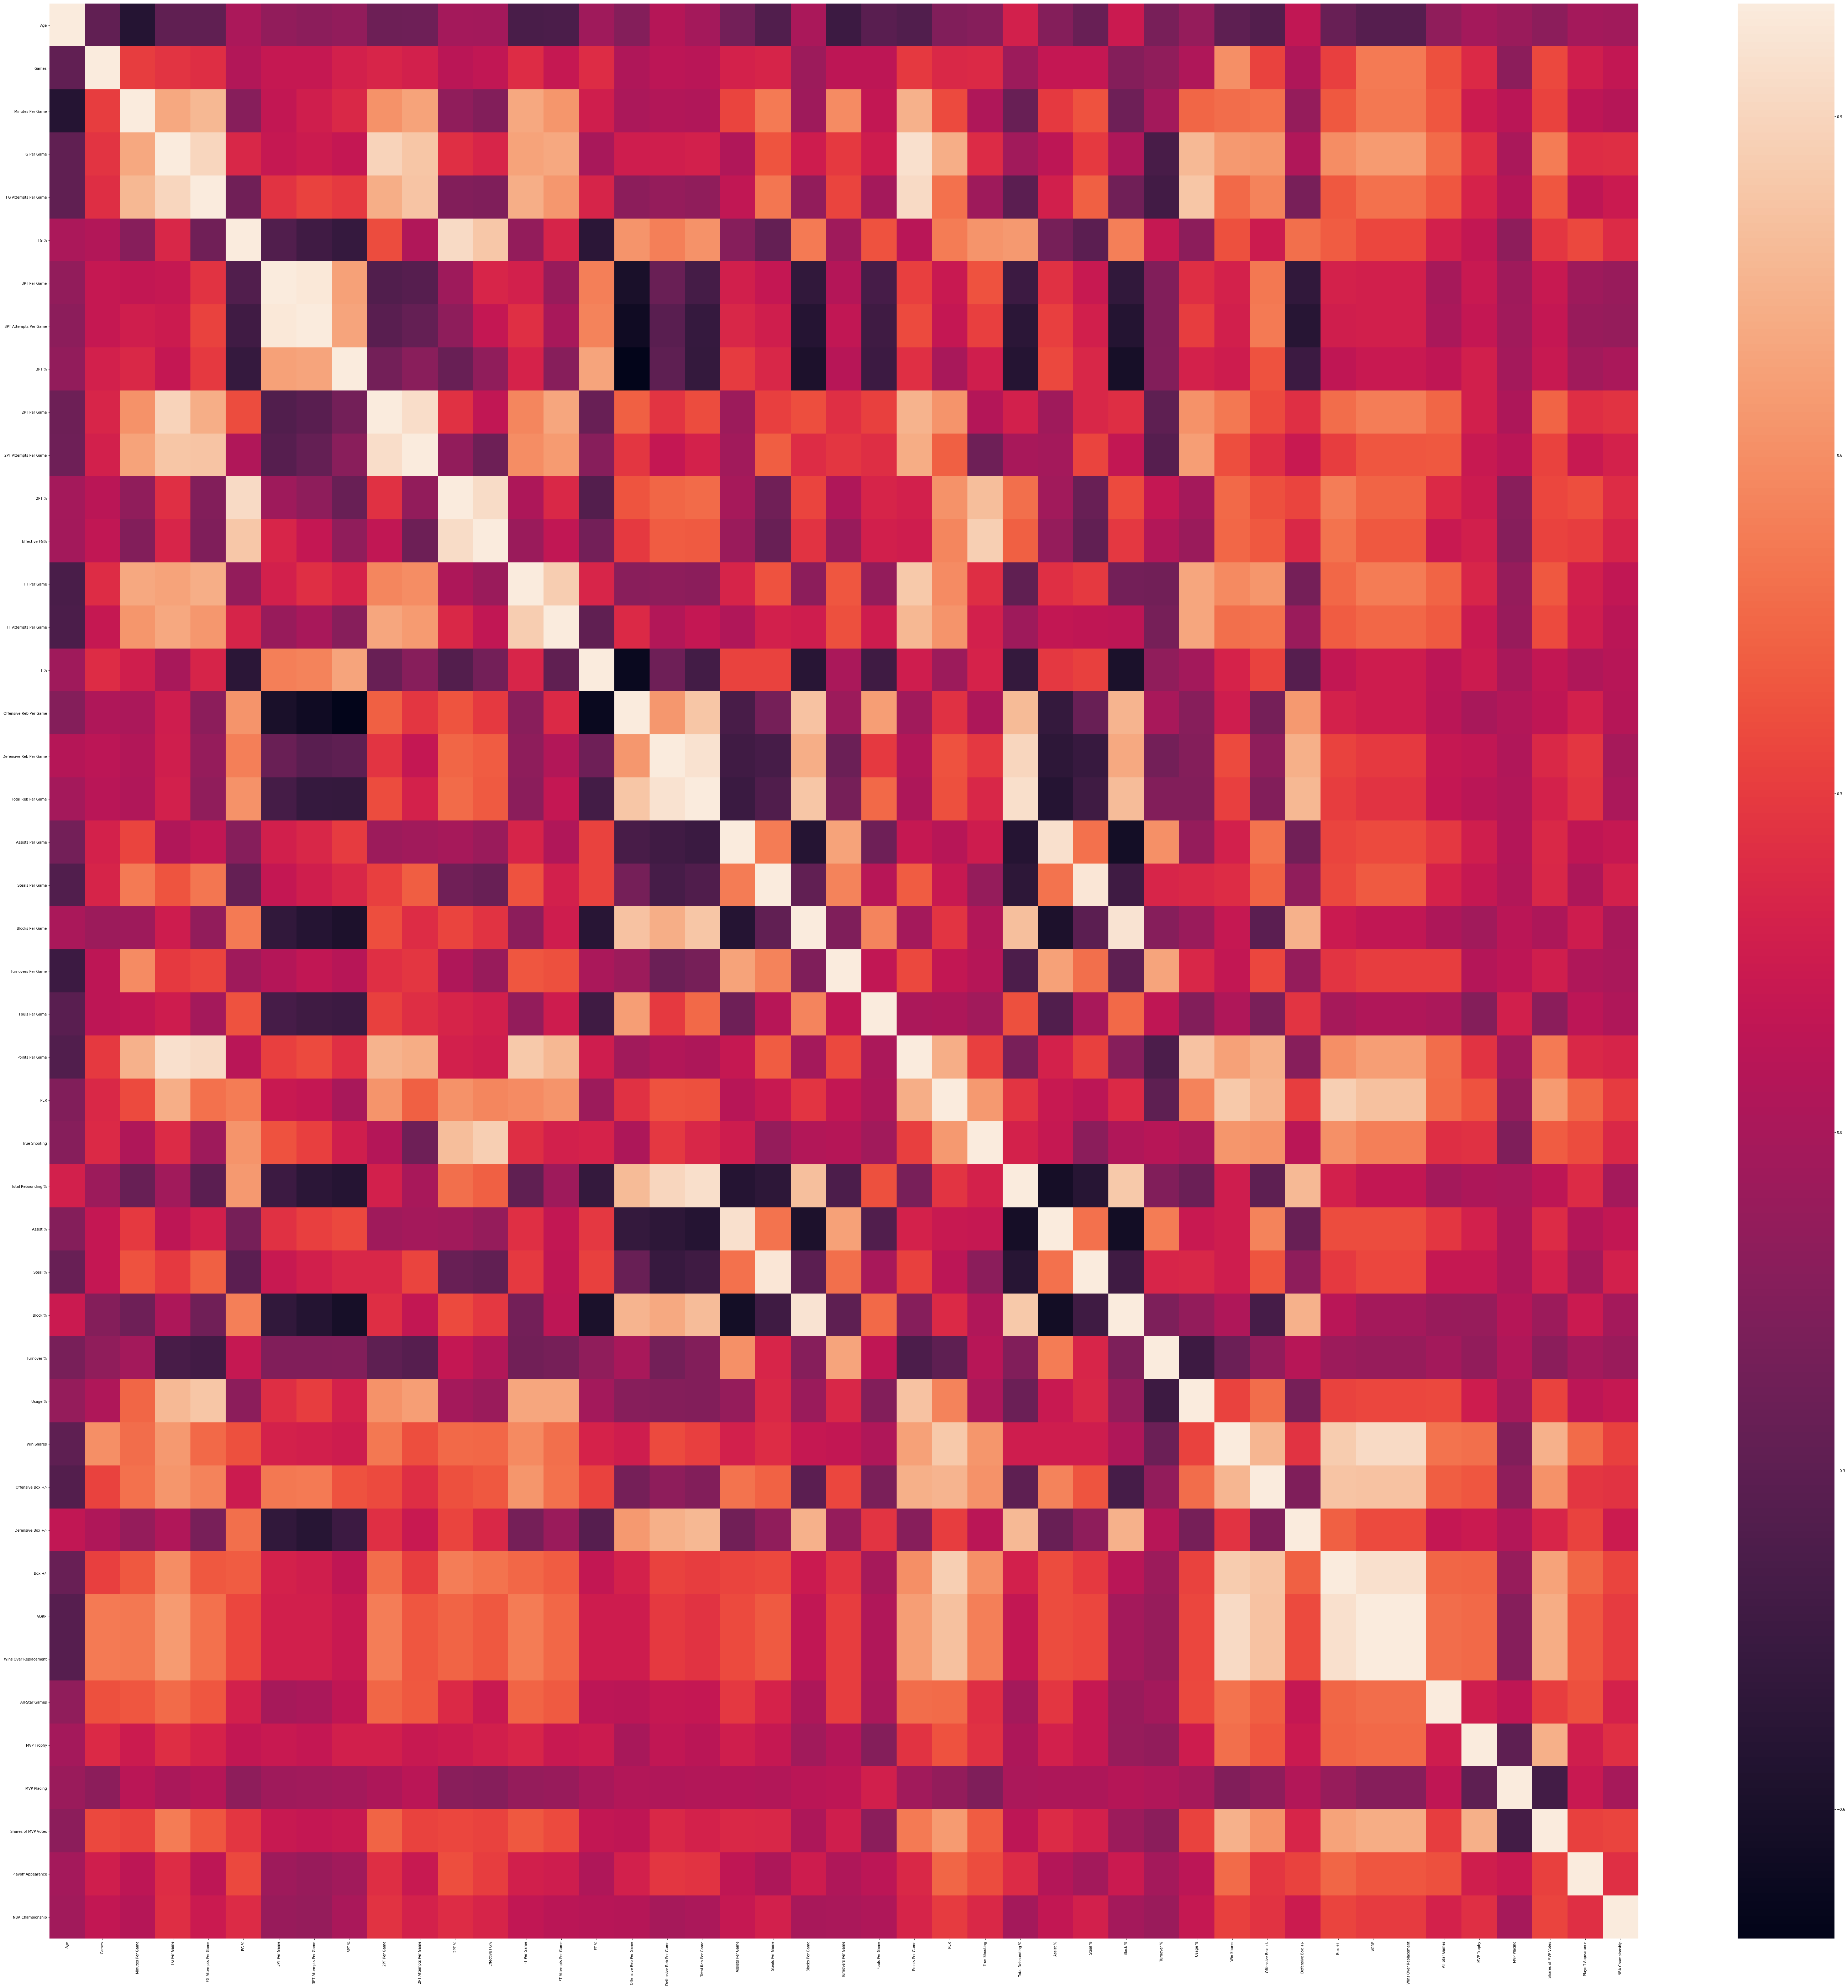

In [6]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(corr, xticklabels=corr.columns,
           yticklabels=corr.columns);

In [7]:
corr["Shares of MVP Votes"].sort_values(ascending=False)

Shares of MVP Votes       1.000000
Win Shares                0.740535
MVP Trophy                0.736103
VORP                      0.725310
Wins Over Replacement     0.725310
Box +/-                   0.684917
PER                       0.649097
Offensive Box +/-         0.615240
FG Per Game               0.525978
Points Per Game           0.524233
2PT Per Game              0.439517
True Shooting             0.411268
FT Per Game               0.401050
FG Attempts Per Game      0.390757
FT Attempts Per Game      0.350974
Games                     0.349472
2PT %                     0.343269
NBA Championship          0.333249
2PT Attempts Per Game     0.329079
Usage %                   0.326679
Minutes Per Game          0.325463
Effective FG%             0.323638
Playoff Appearance        0.321443
All-Star Games            0.308235
FG %                      0.281608
Assist %                  0.232554
Assists Per Game          0.221957
Defensive Reb Per Game    0.217466
Steals Per Game     

In [9]:
y = df["Shares of MVP Votes"]
X = df.drop(columns=["Player Nickname", "VORP", "Block %", "Blocks Per Game", "Fouls Per Game", "Shares of MVP Votes", "Total Rebounding %", "Offensive Reb Per Game"], axis=1)

In [10]:
y.head(5)

Season
1979    0.000
1981    0.097
1982    0.406
1983    0.401
1984    0.338
Name: Shares of MVP Votes, dtype: float64

In [11]:
X.head(5)

Age  Games  Minutes Per Game  FG Per Game  FG Attempts Per Game  \
Season                                                                    
1979     20     77              36.3          6.5                  12.3   
1981     22     78              38.3          7.1                  13.3   
1982     23     79              36.8          6.5                  11.8   
1983     24     67              38.3          6.6                  11.6   
1984     25     77              36.1          6.5                  11.7   

         FG %  3PT Per Game  3PT Attempts Per Game  3PT %  2PT Per Game  \
Season                                                                    
1979    0.530           0.1                    0.4  0.226           6.4   
1981    0.537           0.1                    0.4  0.207           7.1   
1982    0.548           0.0                    0.3  0.000           6.5   
1983    0.565           0.1                    0.4  0.207           6.5   
1984    0.561           0.1                    0.5  0.189           6.5   

              ...         Win Shares  Offensive Box +/-  Defensive Box +/-  \
Season        ...                                                            
1979          ...               10.5                3.3                2.2   
1981          ...               12.9                5.1                3.2   
1982          ...               12.5                5.1                2.3   
1983          ...               10.2                4.1                1.9   
1984          ...               12.7                4.9                0.5   

        Box +/-  Wins Over Replacement  All-Star Games  MVP Trophy  \
Season                                                               
1979        5.5                  14.31               1           0   
1981        8.3                  21.06               1           0   
1982        7.4                  18.63               1           0   
1983        6.1                  14.04               1           0   
1984        5.4                  14.04               1           0   

        MVP Placing  Playoff Appearance  NBA Championship  
Season                                                     
1979              0                   1                 1  
1981              8                   1                 1  
1982              3                   1                 0  
1983              3                   1                 0  
1984              2                   1                 1  

[5 rows x 38 columns]

In [12]:
lm = LinearRegression()

In [13]:
model = lm.fit(X, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
pca = PCA()
pca = pca.fit(X_train)

In [16]:
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

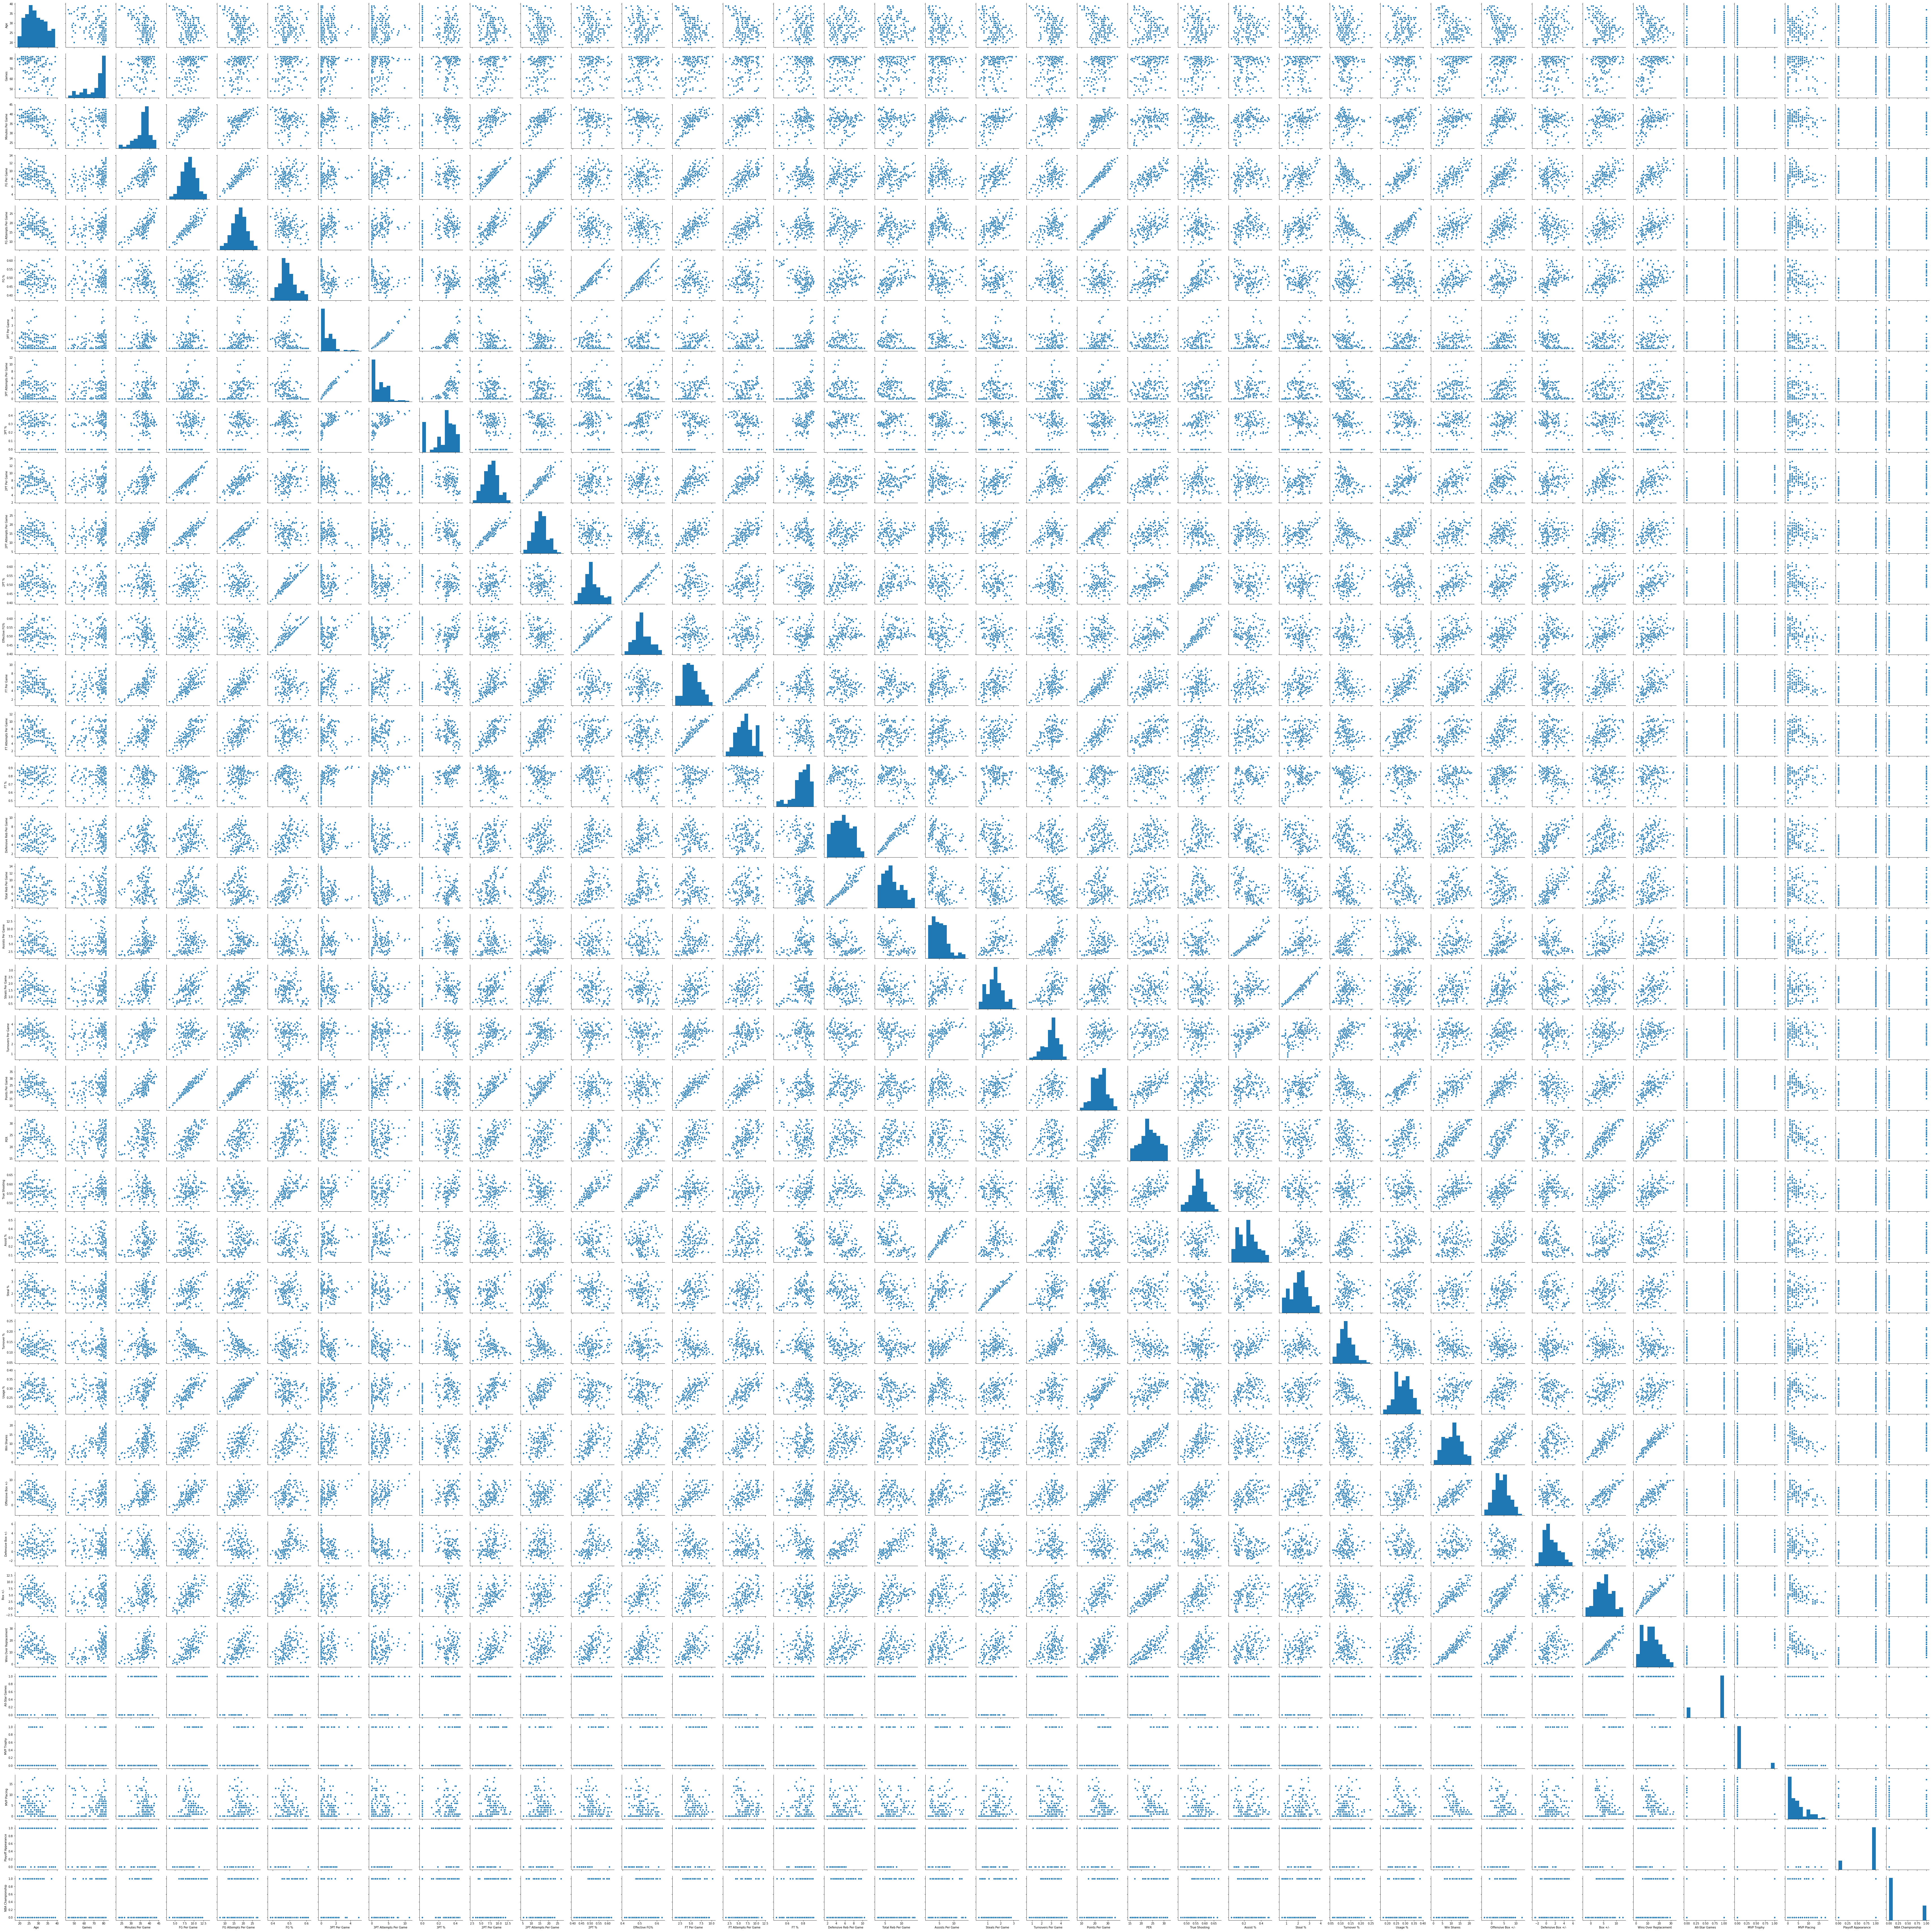

In [17]:
sns.pairplot(X_train)
sns.pairplot(Z_train)

In [18]:
var_exp = pca.explained_variance_ratio_
print("Explained variance: ", var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance: ", cum_var_exp)

Explained variance:  [5.17652367e-01 1.80542564e-01 8.87934769e-02 5.80883379e-02
 5.24111328e-02 4.17180802e-02 2.42746401e-02 1.28944336e-02
 8.77436651e-03 4.01486553e-03 3.33683165e-03 1.71283319e-03
 1.65091113e-03 9.83963419e-04 8.37272834e-04 5.74653886e-04
 5.59527511e-04 2.90146433e-04 2.13618794e-04 2.03673580e-04
 1.68668960e-04 1.30406564e-04 1.00837266e-04 4.44032042e-05
 1.14634876e-05 7.89592430e-06 1.78954502e-06 1.65758468e-06
 1.61582802e-06 1.31449522e-06 1.16629347e-06 5.49471973e-07
 3.51482312e-07 6.77596348e-08 5.24709435e-08 3.79537481e-08
 1.72519975e-08 6.87471205e-09]
Cumulative explained variance:  [0.51765237 0.69819493 0.78698841 0.84507675 0.89748788 0.93920596
 0.9634806  0.97637503 0.9851494  0.98916427 0.9925011  0.99421393
 0.99586484 0.9968488  0.99768608 0.99826073 0.99882026 0.99911041
 0.99932402 0.9995277  0.99969637 0.99982677 0.99992761 0.99997201
 0.99998348 0.99999137 0.99999316 0.99999482 0.99999644 0.99999775
 0.99999892 0.99999947 0.999999

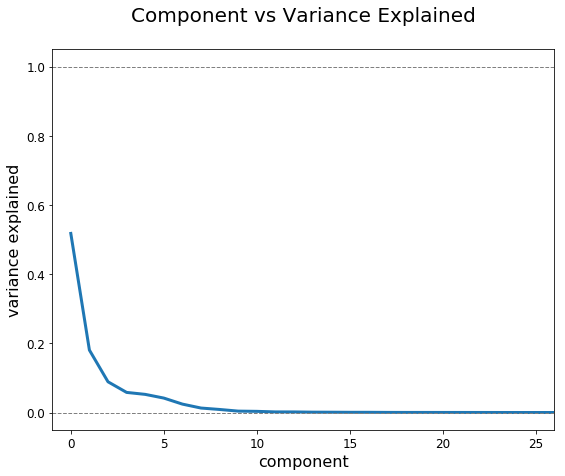

In [19]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp))
plt.plot(component_number, var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

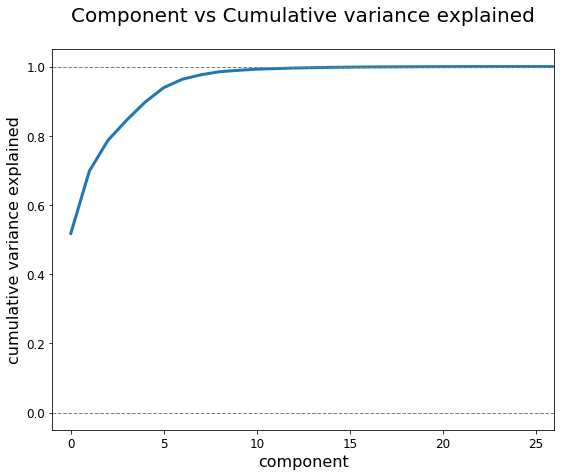

In [20]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

In [21]:
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.7894104460216872

In [22]:
model.score(X,y)

0.846947156028492

In [23]:
lm.fit(Z_train, y_train)
lm.score(Z_test, y_test)

0.7894104460216856